# Исследование факторов, влияющих на успешность видеоигр для интернет-магазина «Стримчик»

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
Цель - выявить определяющие успешность игры закономерности для того, чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

План исследования: 

 - Загрузка и предобработка данных
 - Исследовательский анализ данных и преобразование данных
 - Сопоставление портрета пользователя каждого региона
 - Проверка гипотез

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns

## Загрузка данных

In [4]:
df = pd.read_csv('games.csv')

In [5]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Предобработка данных

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Стандартизация названий столбцов

In [9]:
df.columns = (df.columns
              .str.lower()
              .str.strip())

#изменение названий колонок на нижний регистр и удаление лишних пробелов

In [10]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Изменение типов данных

In [12]:
df['year_of_release'].unique() #только целочисленные значения

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

In [13]:
df['year_of_release'] = df['year_of_release'].astype('Int64') #изменение типа данных на Int64

In [14]:
df['user_score'].unique() #уникальные значения user_score

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
df['user_score'].value_counts()['tbd']

2424

Так как в user_score есть значение tbd, не можем изменить тип данных на float64

In [17]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)

Для дальнейшнего исследования было решено заменить tbd (to be decided), что означает, что у игры еще нет рейтинга (он появится в будущем), на NaN.

In [19]:
df['user_score'] = df['user_score'].astype('float64') #изменение типа данных на Float64

### Обработка пропусков

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [22]:
missing_stats = pd.DataFrame({'Кол-во пропусков': df.isnull().sum(),'Доля пропусков': df.isnull().mean().round(4)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Пропусков в данных нет"

,Кол-во пропусков,Доля пропусков
name,2,0.000100
year_of_release,269,0.016100
genre,2,0.000100
critic_score,8578,0.513200
user_score,9125,0.545900
rating,6766,0.404800


In [23]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [24]:
df = df.dropna(subset=['name'])

In [25]:
missing_stats = pd.DataFrame({'Кол-во пропусков': df.isnull().sum(),'Доля пропусков': df.isnull().mean().round(4)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Пропусков в данных нет" 
# после удаления пропусков в name, пропуски в genre тоже удалились

,Кол-во пропусков,Доля пропусков
year_of_release,269,0.016100
critic_score,8576,0.513100
user_score,9123,0.545900
rating,6764,0.404700


2 строки с пропусками в столбце 'name', так как их невозможно восстановить, решено полностью удалить данные строки

In [27]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,<NA>,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,<NA>,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,<NA>,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,<NA>,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,<NA>,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,<NA>,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,<NA>,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [28]:
df = df.dropna(subset=['year_of_release'])

In [29]:
missing_stats = pd.DataFrame({'Кол-во пропусков': df.isnull().sum(),'Доля пропусков': df.isnull().mean().round(4)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Пропусков в данных нет" 

,Кол-во пропусков,Доля пропусков
critic_score,8461,0.514500
user_score,8981,0.546200
rating,6676,0.406000


Пропуски в столбце year_of_release скорее всего связаны с технической ошибкой при выгрузке данных, так как их невозможно замнить и их 269, данные решено удалить и сообщить об ошибке.

In [31]:
df['rating'] = df['rating'].fillna("Unrated")

In [32]:
missing_stats = pd.DataFrame({'Кол-во пропусков': df.isnull().sum(),'Доля пропусков': df.isnull().mean().round(4)})
missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
missing_stats.style.background_gradient(cmap='coolwarm') if not missing_stats.empty else "Пропусков в данных нет" 

,Кол-во пропусков,Доля пропусков
critic_score,8461,0.514500
user_score,8981,0.546200


Поскольку рейтинг ESRB применяется только для игр, распространяемых в США и Канаде, а в других регионах этот рейтинг часто отсутствует. Заполняем пропуски в столбце с рейтингом ESRB заглушкой (значением "Unrated") для  для того, чтобы сохранить в анализе игры без официального рейтинга. 

In [34]:
df.query('critic_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unrated
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unrated
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unrated
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unrated
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,Unrated
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unrated
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unrated
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unrated
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unrated


In [35]:
df.query('user_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unrated
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unrated
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,Unrated
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,Unrated
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,Unrated
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unrated
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unrated
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unrated
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unrated


Около 8 тысяч строк имеют пропуски в столбцах critic_score, user_score. Эти параметры невозможно заменить, скорее всего их отсутствие тоже связано с технической ошибкой при выгрузке данных. Пропуски решено оставить для дальнейшего анализа.

### Проверка на дубликаты

In [38]:
df[df.duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [39]:
df[df.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


In [40]:
df = df.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first') #удаляем дубликат

In [41]:
df['platform'].unique() #проверка платформ на неявные дубликаты

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Была найдена и удалена строка дубликат по колонкам 'name', 'platform', 'year_of_release'

### Суммарные продажи во всех регионах
Создаем отдельный столбец для суммарных продаж во всех регионах

In [44]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

### Вывод
Изначально был получен датасет с историческими данными о продажах игр, оценки пользователей и экспертов, жанры и платформы. Таблица содержала 16443 и 10 столбцов.

- Были стандартизированы названия столбцов
- Изменены типы данных в столбцах `year_of_release`, `user_score`. В стобце `user_score` значение tbd заменено на NaN. 
- Была найдена и удалена строка дубликат по колонкам 'name', 'platform', 'year_of_release'. 
- Были найдены пропуски в столбцах `name`,`year_of_release`,`genre`,`critic_score`,`user_score`,`rating`. В столбцах `name` и `genre`, `year` были удалены 271 строки с пропусками. В столбце `rating` пропуски заменены заглушкой "Unrated". В остальных стобцах решено оставить пропуски для дальнейшего анализа, так как заменить их не является возможным. Скорее всего пропуски вызваны технической ошибкой при выгрузки данных. 
- Добавлен столбец `total_sales` с суммарными продажами со всех регионов.

In [46]:
# Посмотрим, что осталось
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(df.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, df[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',df[col_l].isna().sum(),
        ', процент NaN', round(df[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
name :

## Исследовательский анализ данных
Задача: Описать и визуализировать информацию об играх, найти закономерности и преобразовать данные.

### Частота выпуска игр по годам

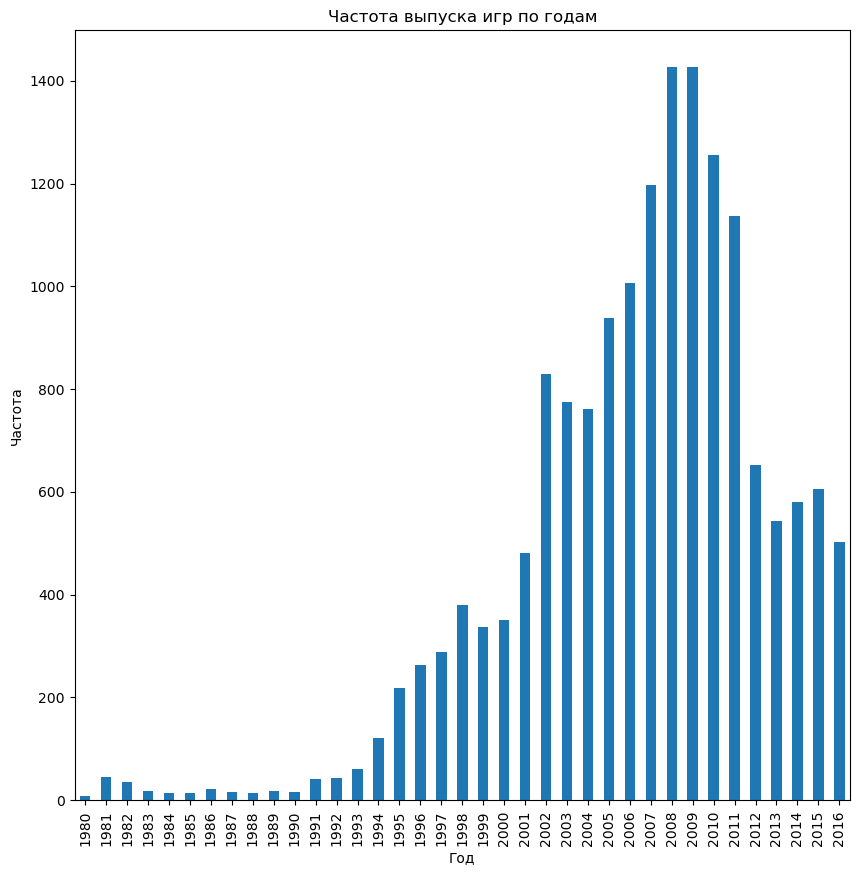

In [49]:
df['year_of_release'].value_counts().sort_index().plot(kind='bar', title='Частота выпуска игр по годам',figsize=(10,10));
plt.xlabel('Год');
plt.ylabel('Частота');
#Построение графика barplot частоты выпуска игр по годам

Распределение частоты выпуска игр по годам приближённое к нормальному, с пиком в 2008–2009 годах, но с выраженной асимметрией — левая часть более пологая, чем правая, распределение скошенно вправо. 

Очень мало игр выходило до 1995 года, менее 300 игр - решено удалить эти значения. 

In [51]:
df = df[df['year_of_release']>1995] #делаем срез, оставляем только игры вышедшие после 1995 года

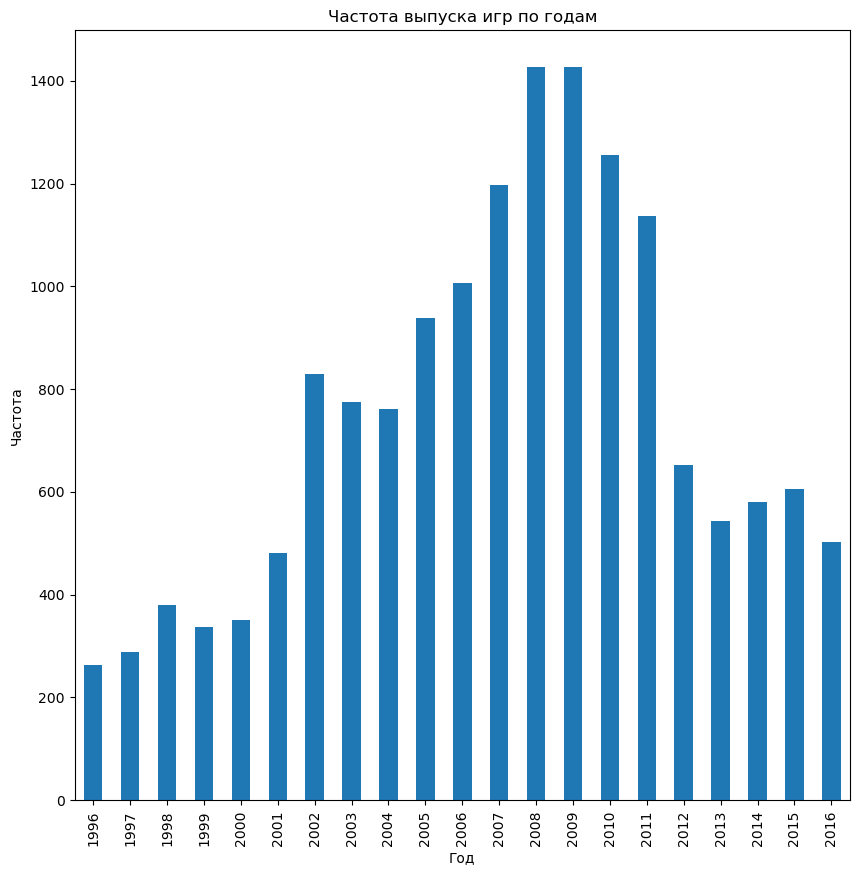

In [52]:
df['year_of_release'].value_counts().sort_index().plot(kind='bar', title='Частота выпуска игр по годам',figsize=(10,10));
plt.xlabel('Год');
plt.ylabel('Частота');
#Построение графика barplot частоты выпуска игр по годам

### Продажи по годам для топ-5 платформ

In [54]:
platform_year = df.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
#общая сумма продаж по платформам по годам

In [55]:
top_platforms = platform_year.groupby('platform')['total_sales'].sum().nlargest(5).index
#5 платформ с большими продажами

In [56]:
top_platform_year = platform_year[platform_year['platform'].isin(top_platforms)]
#общая сумма продаж по топ 5 платформам по годам

In [57]:
pivot_df = top_platform_year.pivot(
    index='year_of_release',
    columns='platform',
    values='total_sales'
)
#пивот таблица для построения графика

In [58]:
pivot_df

platform,DS,PS2,PS3,Wii,X360
year_of_release,,,,,
2000,NaN,39.17,NaN,NaN,NaN
2001,NaN,166.43,NaN,NaN,NaN
2002,NaN,205.38,NaN,NaN,NaN
2003,NaN,184.31,NaN,NaN,NaN
2004,17.27,211.81,NaN,NaN,NaN
2005,130.14,160.66,NaN,NaN,8.25
2006,119.81,103.42,20.96,137.15,51.62
2007,146.94,75.99,73.19,152.77,95.41
2008,145.31,53.90,118.52,171.32,135.26


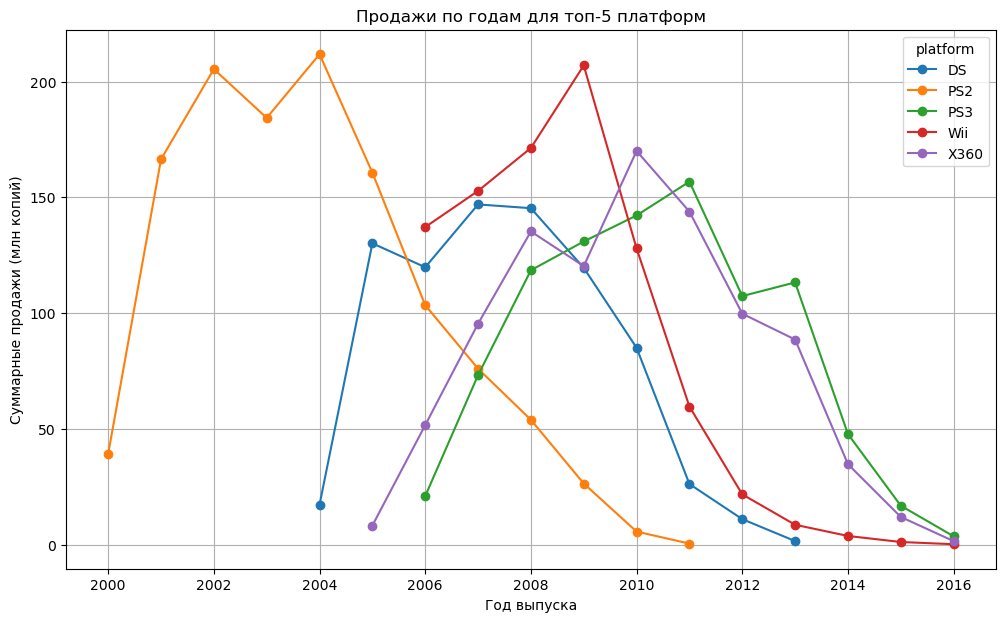

In [59]:
pivot_df.plot(
    marker='o',
    figsize=(12, 7),
    title='Продажи по годам для топ-5 платформ'
)

plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.grid(True)
#построение графика для топ-5 платформ по продажам по годам

In [60]:
# Опредение срока жизни платформ
time_life = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

Характерный срок жизни платформы в топе - около 7 лет, за это время продажи у топовых платформ сохраняются на высоком уровне, потом идет сильный спад. Заметно, что в 2004-2006 появляется большинство платформ в топе. Они выходят с интервалом в 1–3 года, чаще всего группами и достигают свой пик продаж примерно на 2-3 год после выпуска. К 2015-2016 году все платформы из топ-5 по суммарным продажам продажам потеряли свою актуальность.

### Продажи для платформ за последние 3 года

In [63]:
actual_platforms = platform_year[platform_year['year_of_release']>2013].sort_values(by='total_sales',ascending=False)
actual_platforms
#платформы, у которых есть продажи за последние 3 года

,platform,year_of_release,total_sales
107,PS4,2015,118.90
106,PS4,2014,100.00
108,PS4,2016,69.25
177,XOne,2015,60.14
176,XOne,2014,54.07
102,PS3,2014,47.76
3,3DS,2014,43.76
163,X360,2014,34.74
4,3DS,2015,27.78
178,XOne,2016,26.15


In [64]:
#сводная таблица для построения графика
actual_platforms_plot = actual_platforms.pivot(
    index='year_of_release',
    columns='platform',
    values='total_sales'
)

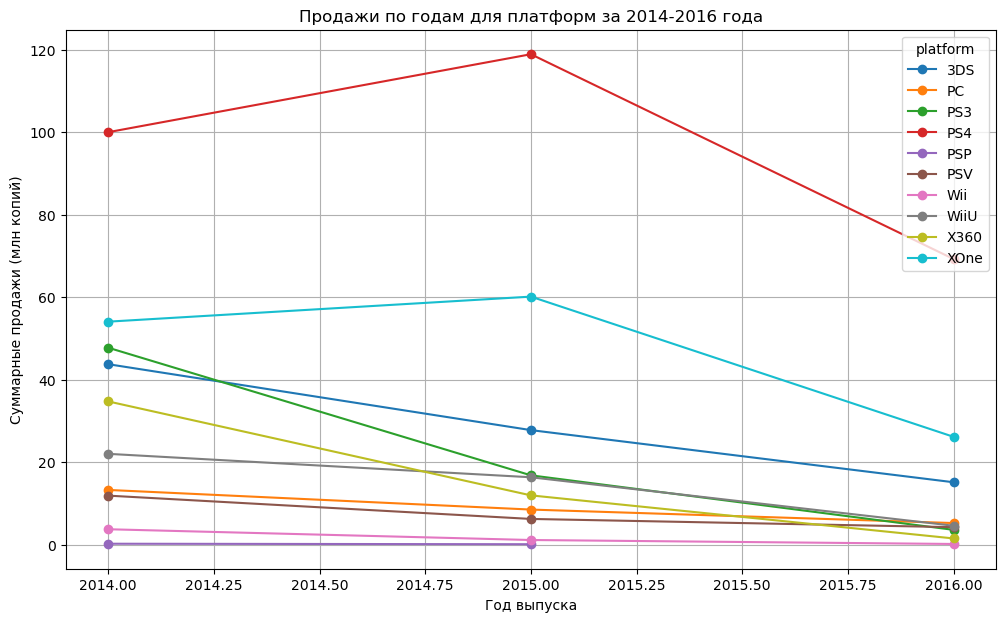

In [65]:
#построение графика для платформ за 2014-2016 года
actual_platforms_plot.plot(
    marker='o',
    figsize=(12, 7),
    title='Продажи по годам для платформ за 2014-2016 года'
)

plt.xlabel('Год выпуска')
plt.ylabel('Суммарные продажи (млн копий)')
plt.grid(True)

In [66]:
platform_year.query('platform in ["PS4","XOne"]') #данные для самых платформ, у которых больше всего продаж за 2015-2016 года

,platform,year_of_release,total_sales
105,PS4,2013,25.99
106,PS4,2014,100.00
107,PS4,2015,118.90
108,PS4,2016,69.25
175,XOne,2013,18.96
176,XOne,2014,54.07
177,XOne,2015,60.14
178,XOne,2016,26.15


Самые крупные продажи за 2015-2016 год были у PS4 , XOne.

### Выделение актуального периода
В связи с тем, что  нужно построить прогноз на 2017 год - нужны актуальные данные.

В датасете большинство игр вышло в 2007 году, но платформы, которые были актуальны в те года, уже не актуальны в 2016 году. В 2013 году появились консоли нового поколения, PS4 и XOne, но начали набирать популярность в 2014, поэтому решено взять данные с 2014 по 2016 года.

In [69]:
df = df.query('year_of_release>2013') #срез, оставялем игры вышедшие после 2014 года

C:\Users\Player\AppData\Local\Temp\ipykernel_16424\1103137861.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  df = df.query('year_of_release>2013') #срез, оставялем игры вышедшие после 2014 года


In [70]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Unrated,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,Unrated,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,Unrated,7.98


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 173.2+ KB


После среза, в датасете осталось всего 1689 строк.

### Изучение продаж актуального периода

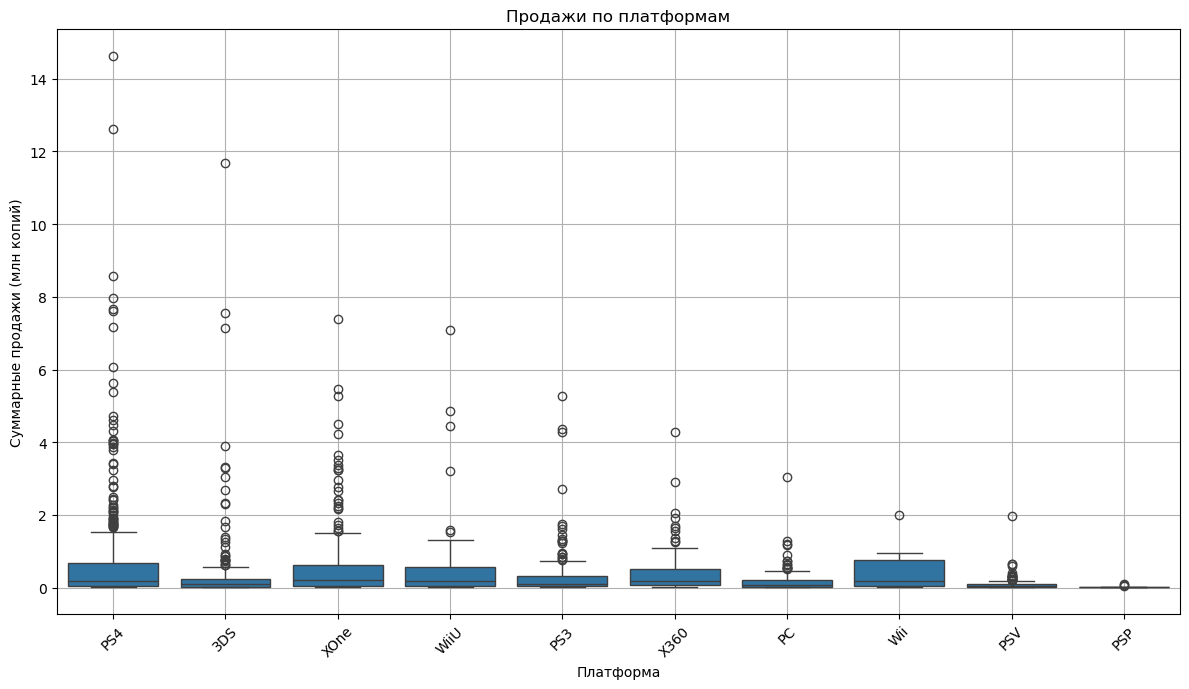

In [74]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='platform', y='total_sales')
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн копий)')
plt.grid(True)
plt.xticks(rotation=45)  # чтобы подписи не налезали друг на друга
plt.tight_layout()

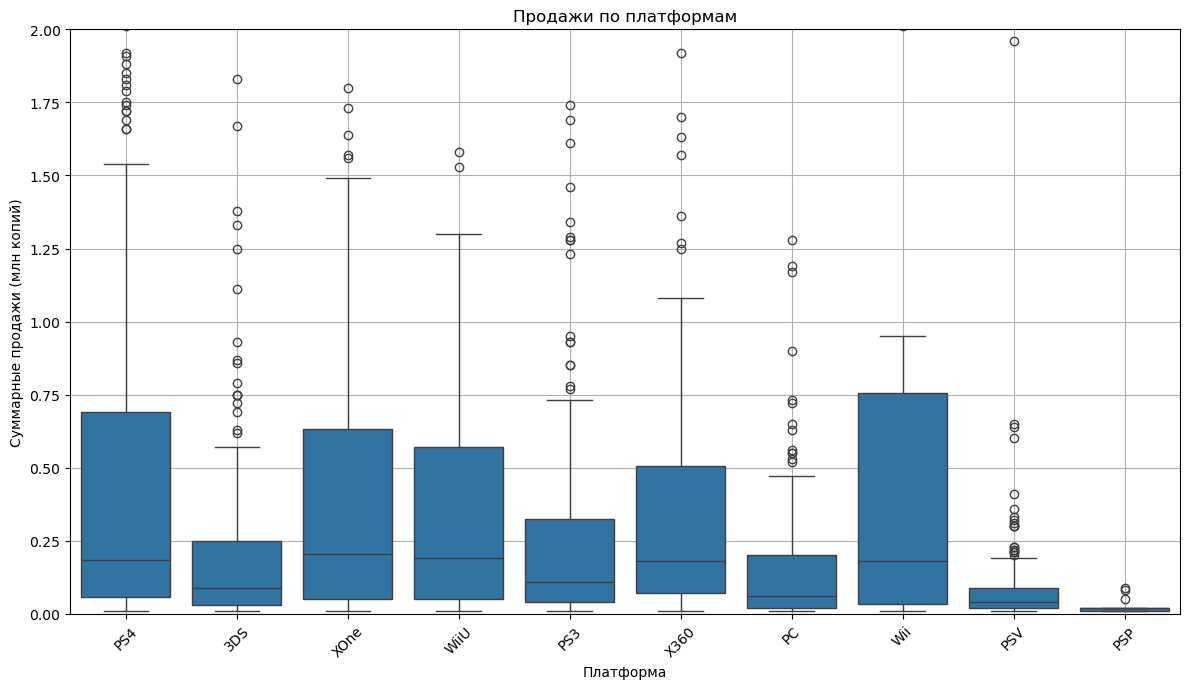

In [75]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='platform', y='total_sales')
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн копий)')
plt.grid(True)
plt.ylim(0,2)
plt.xticks(rotation=45)  # чтобы подписи не налезали друг на друга
plt.tight_layout()

По графику boxplot видно, что за последние 3 года у всех платформ медианные продажи на игру составляют менее 0.25 млн копий. Наибольшее число выбросов зафиксировано у 3DS, PS4 и XOne.

### Влияние на продажи на платформе PS4 отзывов пользователей и критиков
Оценим влияние на отзывов на продажи на платформе PS4 (платформе с наибольшим количеством продаж за последнее время), с помощью диаграммы рассеяния и корреляции.

In [78]:
ps4_df = df.query('platform == "PS4"') #только игры с ps4
ps4_sales_score = ps4_df[['total_sales','user_score','critic_score']]

In [79]:
ps4_sales_score.corr() 

,total_sales,user_score,critic_score
total_sales,1.000000,-0.040132,0.402661
user_score,-0.040132,1.000000,0.546434
critic_score,0.402661,0.546434,1.000000


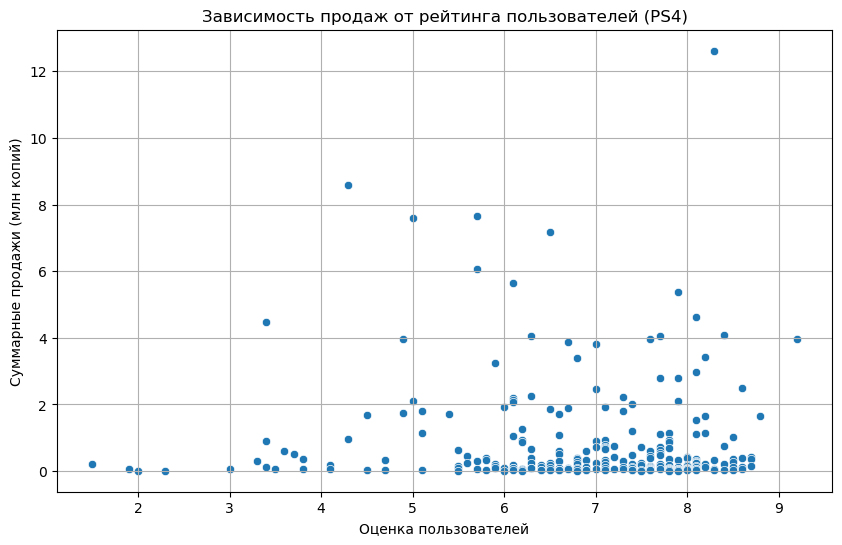

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ps4_sales_score, x='user_score', y='total_sales')
plt.title('Зависимость продаж от рейтинга пользователей (PS4)')
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи (млн копий)')
plt.grid(True)
#строим график рассеяности Зависимости продаж от рейтинга пользователей

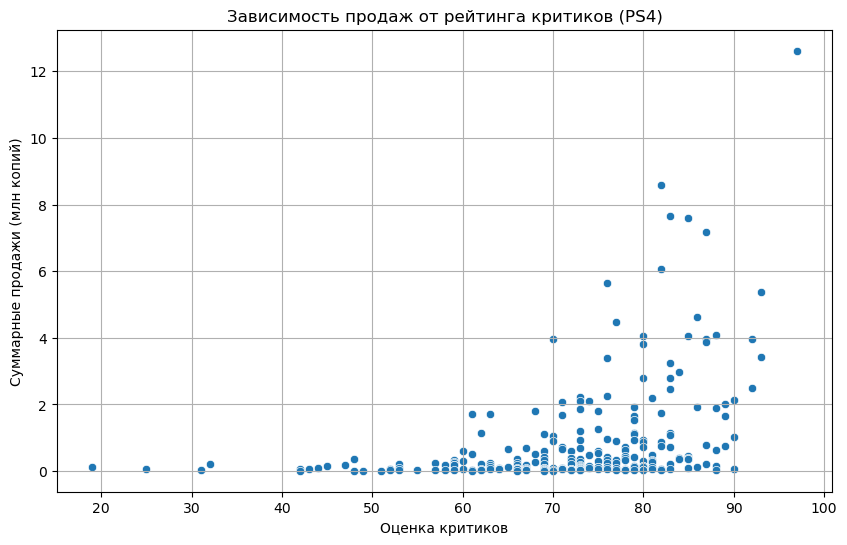

In [81]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ps4_sales_score, x='critic_score', y='total_sales')
plt.title('Зависимость продаж от рейтинга критиков (PS4)')
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи (млн копий)')
plt.grid(True)
#строим график рассеяности Зависимости продаж от рейтинга критиков

На платформе PS4 наблюдается слабая прямая зависимость (корреляция 0.4) между оценкой критиков и суммарными продажами. Между оценкой пользователей и продажами зависимости почти нет (корреляция -0.03).

###  Сравнение влияния рейтингов на продажи

In [84]:
platforms_names = ['XOne','PS3','3DS']

In [85]:
xone_df = df.query('platform == "XOne"') #только игры с Xone
xone_sales_score = xone_df[['total_sales','user_score','critic_score']]

In [86]:
ps3_df = df.query('platform == "PS3"') #только игры с Ps3
ps3_sales_score = ps3_df[['total_sales','user_score','critic_score']]

In [87]:
threeds_df = df.query('platform == "3DS"')#только игры с 3DS
threeds_sales_score = threeds_df[['total_sales','user_score','critic_score']]

In [88]:
for platform_name, score in zip(platforms_names,(xone_sales_score,ps3_sales_score,threeds_sales_score)):
    print("Корряционная матрица",platform_name)
    display(score.corr())

Корряционная матрица XOne


,total_sales,user_score,critic_score
total_sales,1.000000,-0.070384,0.428677
user_score,-0.070384,1.000000,0.440977
critic_score,0.428677,0.440977,1.000000


Корряционная матрица PS3


,total_sales,user_score,critic_score
total_sales,1.000000,-0.166761,0.446575
user_score,-0.166761,1.000000,0.693445
critic_score,0.446575,0.693445,1.000000


Корряционная матрица 3DS


,total_sales,user_score,critic_score
total_sales,1.000000,0.215193,0.314117
user_score,0.215193,1.000000,0.862485
critic_score,0.314117,0.862485,1.000000


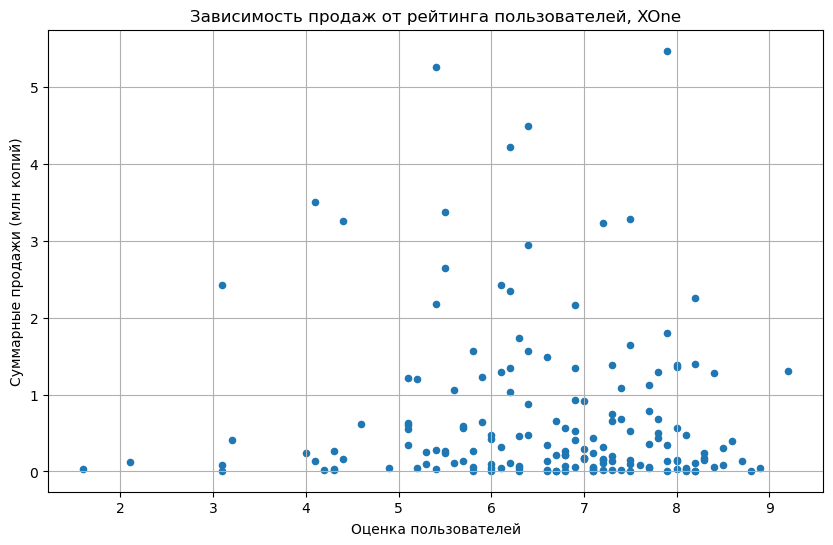

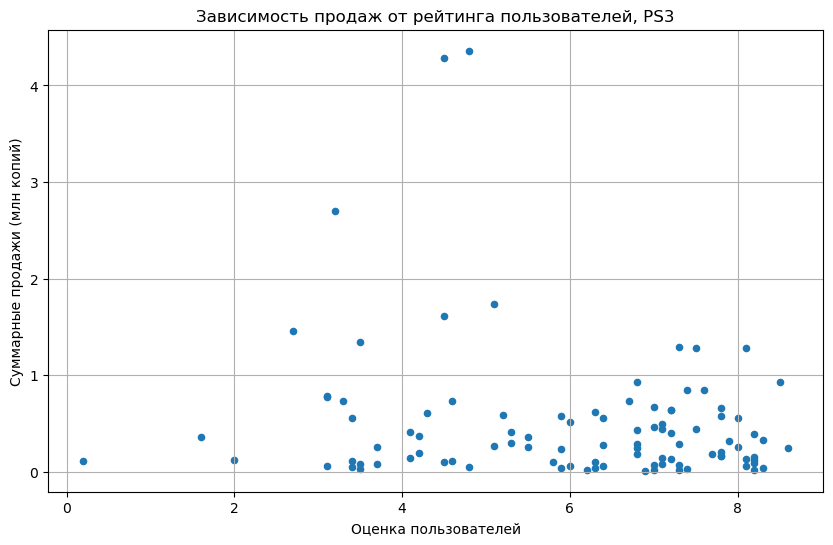

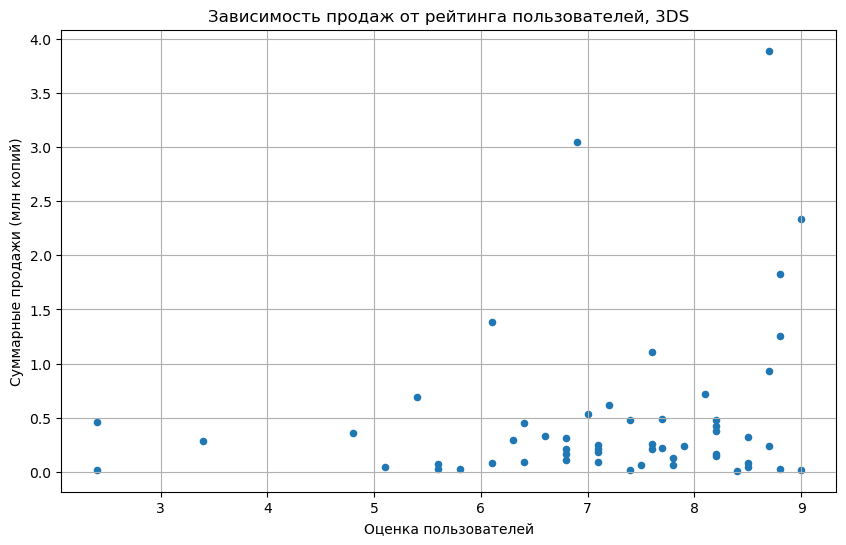

In [89]:
for platform_name, score in zip(platforms_names,(xone_sales_score,ps3_sales_score,threeds_sales_score)):
    score.plot(
    kind='scatter',
    x='user_score',
    y='total_sales',
    figsize=(10, 6),
    title=(f'Зависимость продаж от рейтинга пользователей, {platform_name}')
)
    plt.xlabel('Оценка пользователей')
    plt.ylabel('Суммарные продажи (млн копий)')
    plt.grid(True)

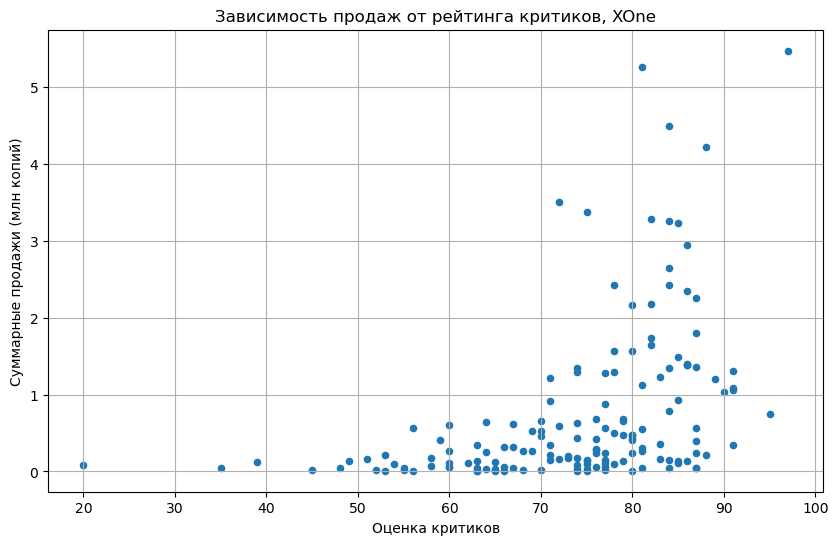

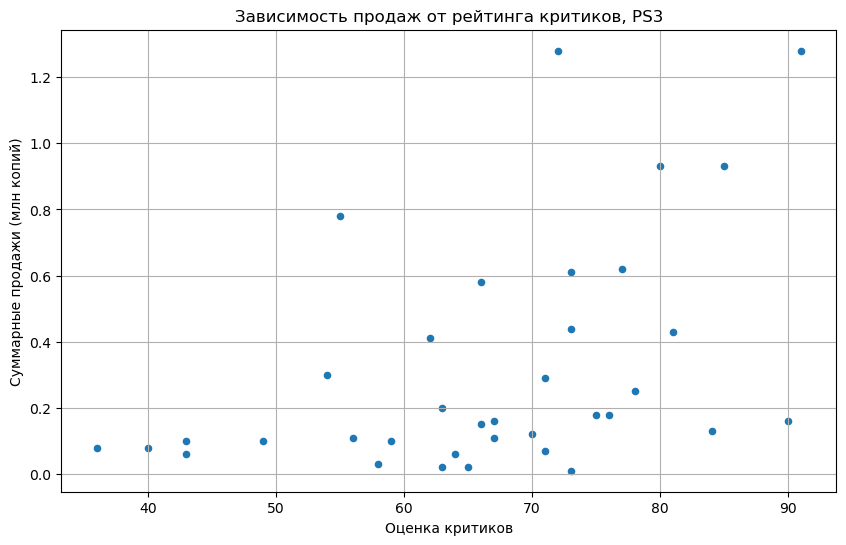

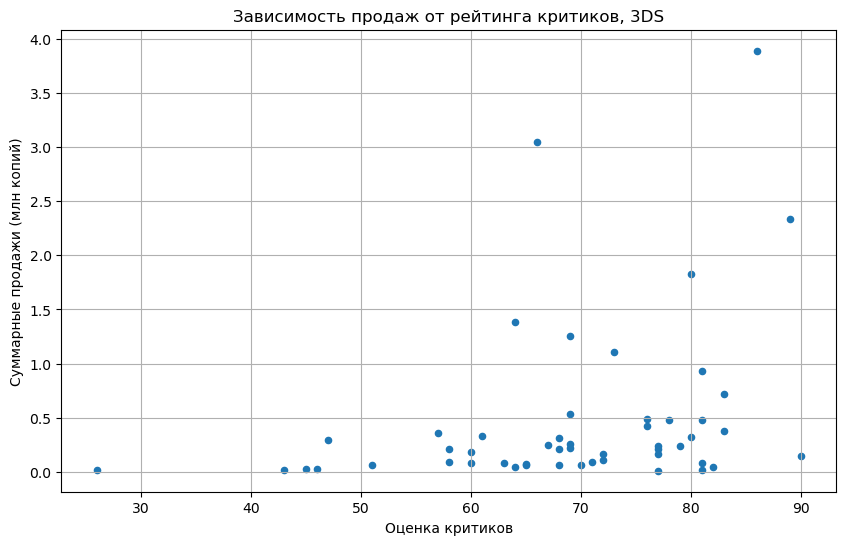

In [90]:
for platform_name, score in zip(platforms_names,(xone_sales_score,ps3_sales_score,threeds_sales_score)):
    score.plot(
    kind='scatter',
    x='critic_score',
    y='total_sales',
    figsize=(10, 6),
    title=(f'Зависимость продаж от рейтинга критиков, {platform_name}')
)
    plt.xlabel('Оценка критиков')
    plt.ylabel('Суммарные продажи (млн копий)')
    plt.grid(True)

На всех платформах положительная слабая зависимость между оценкой критиков и продажами, около 0.4 на консолях PS3, PS4, XOne и менее выражена на консоли 3DS, 0.3. Между пользовательской оценкой и продажами у 3DS очень слабая положительная связь (0.2), у PS3 очень слабая отрицательная связь (-0.16), на других платформах связи не выявлено.

### Общее распределение игр по жанрам

In [93]:
genre_sales = df.pivot_table(
    index='genre',
    aggfunc=['count','sum'],
    values='total_sales'
)
#сводная таблица общего распределения игр по жанрам

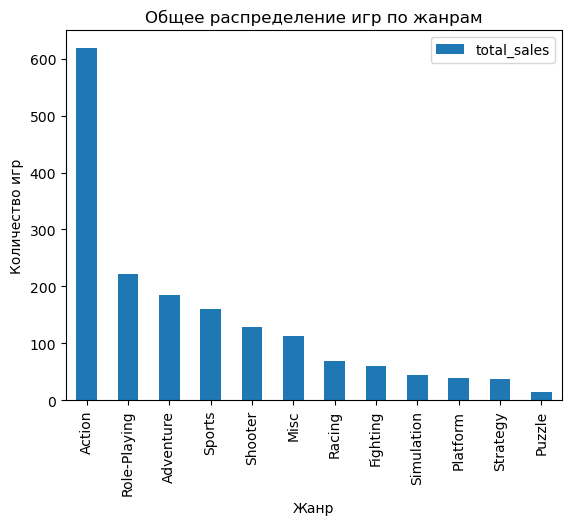

In [94]:
genre_sales['count'].sort_values(
    by='total_sales',
    ascending=False
).plot(
    kind='bar',
    title='Общее распределение игр по жанрам'
)
plt.xlabel('Жанр');
plt.ylabel('Количество игр');
#строим график barplot общего распределения игр по жанрам

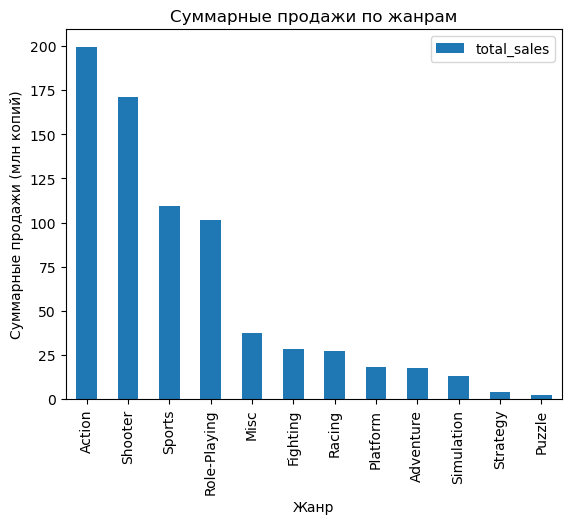

In [95]:
genre_sales['sum'].sort_values(
    by='total_sales',
    ascending=False
).plot(
    kind='bar',
    title='Суммарные продажи по жанрам');
plt.xlabel('Жанр');
plt.ylabel('Суммарные продажи (млн копий)');
#строим график barplot суммарных продаж игр по жанрам

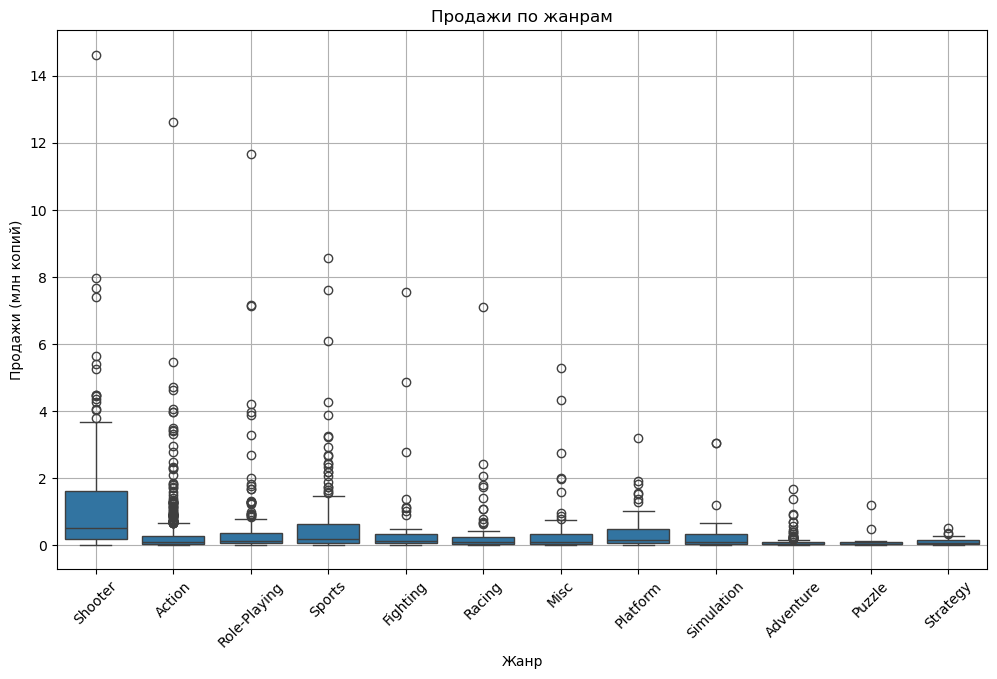

In [221]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='genre', y='total_sales')
plt.title('Продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн копий)')
plt.grid(True)
plt.xticks(rotation=45);

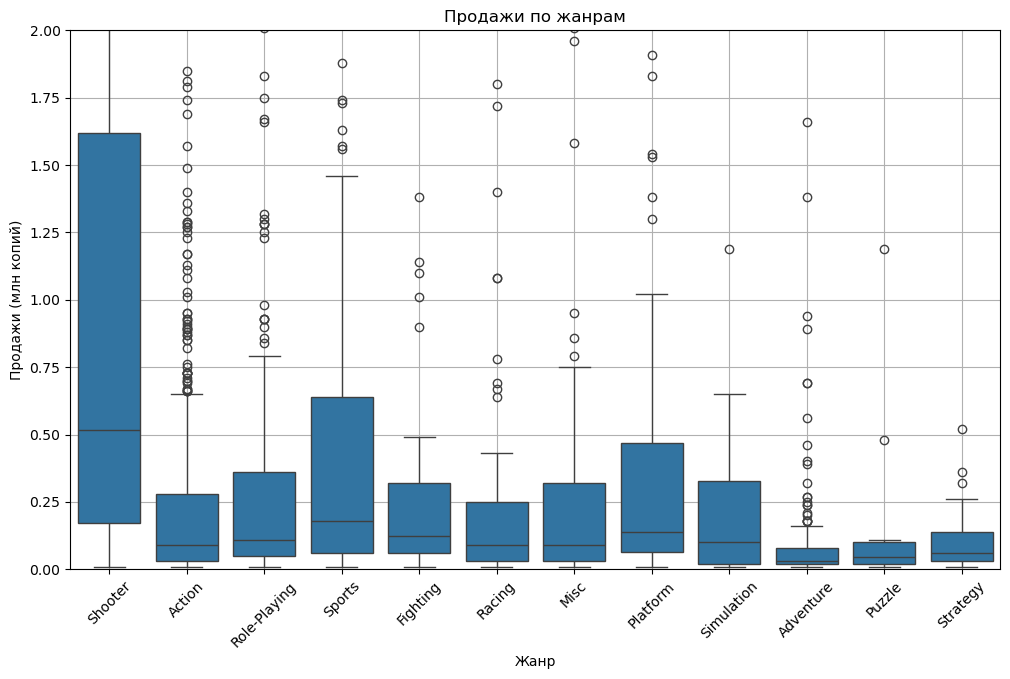

In [223]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='genre', y='total_sales')
plt.title('Продажи по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи (млн копий)')
plt.grid(True)
plt.xticks(rotation=45);
plt.ylim(0,2)
plt.grid(True)

- За последние 3 года больше всего игр вышло в жанре Action, более 600. 
- Больше всего суммарных продаж принесли жанры Shooter и Action (более 150 млн. копий), жанры Sports, Role-Playing так же принесли большое количество продаж, около 100 млн. копий. У всех остальных жанров продано менее 40 млн. копий. 
- Важно заметить, что жанра Shooter было выпущено всего 128 игр, но продажи у жанра самые высокие.
- Если оценивать по медианным значениям продаж, то лучше всего себя показывает жано Shooter, с медиаными продажами около 0.5 млн копий. Жанр Action имеет огромное количество выбросов, но медианное значение менее 0.25 млн. копий.

### Вывод

В результате исследовательского анализа были выявлены закономерности и преобразованы данные (осталось 1689 строк):

- Распределение частоты выпуска игр по годам приближённое к нормальному, с пиком в 2008–2009 годах, но с выраженной асимметрией — левая часть более пологая, чем правая, распределение скошенно вправо. Игры, выпущенные до 1995 года, встречаются крайне редко, они были удалены.

- Характерный срок жизни платформы в топе - около 5 лет, за это время продажи у топовых платформ сохраняются на высоком уровне, потом идет сильный спад. Заметно, что в 2004-2006 появляется большинство платформ в топе. Они выходят с интервалом в 1–3 года, чаще всего группами и достигают свой пик продаж примерно на 2-3 год после выпуска.

- К 2016 году все платформы из топ-5 по продажам устарели. С 2013 на рынок вышли консоли нового поколения — PS4 и XOne, но массовая популярность пришла к ним только с 2014 года. Поэтому в дальнейшем анализе использовались данные за 2014–2016 годы.

- По графику boxplot видно, что за последние 3 года у всех платформ медианные продажи на игру составляют менее 0.25 млн копий. Наибольшее число выбросов зафиксировано у 3DS, PS4 и XOne.

- На всех платформах положительная зависимость между оценкой критиков и продажами, около 0.4 на консолях PS3, PS4, XOne и менее выражена на консоли 3DS, 0.3. Между пользовательской оценкой и продажами у 3DS умеренная положительная связь (0.2), у PS3 небольшая отрицательная связь (-0.16), на других платформах связи не выявлено.

- По числу выпущенных игр лидирует жанр Action (более 600 игр за 3 года).

- Наибольшие суммарные продажи демонстрируют жанры Shooter и Action (более 150 млн. копий каждый). При этом Shooter оказался самым прибыльным жанром, несмотря на то, что в нём выпущено всего 128 игр.

- Жанры Sports и Role-Playing также показали высокие результаты — около 100 млн. копий продаж каждый.

- Если оценивать по медианным значениям продаж, то лучше всего себя показывает жано Shooter, с медиаными продажами около 0.5 млн копий. Жанр Action имеет огромное количество выбросов, но медианное значение менее 0.25 млн. копий.


## Сопоставление портрета пользователя каждого региона

### Различия в долях продаж топ-5  популярных платформ

In [102]:
pivot_region_platform = df.pivot_table(
    index='platform',
    values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
    aggfunc = 'sum'
)
#сводная таблица с продажами по платформам по регионам

In [103]:
top_5_region_platform = pivot_region_platform.sort_values(by='total_sales',ascending=False)[:5].loc[:,:'other_sales']
#преобразование сводной таблицы, сортируем по total_sales, удаляем total_sales

In [104]:
top_5_region_platform

,eu_sales,jp_sales,na_sales,other_sales
platform,,,,
PS4,130.04,15.02,98.61,44.48
XOne,46.25,0.32,81.27,12.52
3DS,16.12,44.24,22.64,3.68
PS3,25.54,11.22,22.05,9.37
X360,15.49,0.08,28.30,4.35


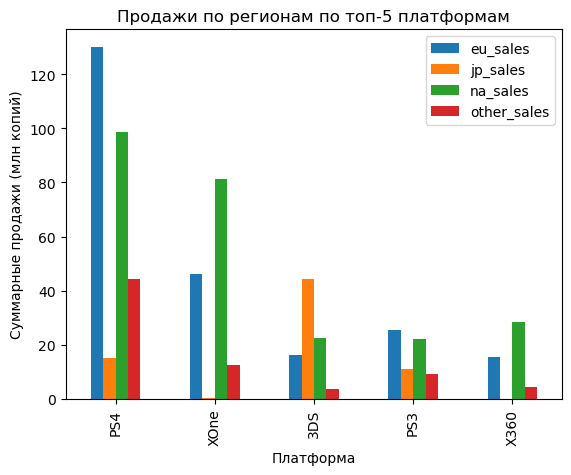

In [105]:
top_5_region_platform.plot(kind='bar',
                        title='Продажи по регионам по топ-5 платформам');
plt.xlabel('Платформа');
plt.ylabel('Суммарные продажи (млн копий)');
#построение графика продажи по регионам по топ-5 платформам

У двух самых популярных платформ не развит японский регион. У 3DS, наоборот - японский регион самый успешный. У Ps3 и Xbox тоже не развит японский регион. У серии Xbox вообще нет игр в японском регионе, скорее всего компания не работает на японскую аудиторию.

### Различия в популярности жанров топ-5 популярных платформ

In [108]:
pivot_region_genres =  df.pivot_table(
    index='genre',
    values=['na_sales','eu_sales','jp_sales','other_sales','total_sales'],
    aggfunc = 'sum'
)
#сводная таблица с продажами по жанрам по регионам

In [109]:
#Cортируем жанры по общим продажам и выбераем топ-5
top_5_genres = pivot_region_genres.sort_values('total_sales', ascending=False).head(5)

#Все остальные жанры
other_genres = pivot_region_genres.drop(top_5_genres.index)

#Сложим продажи остальных жанров в одну строку
other_sum = other_genres.sum()
other_sum.name = 'Other'

#Объединим топ-5 и 'Other'
top_5_with_other = pd.concat([top_5_genres, pd.DataFrame([other_sum])])

#Удаляем total_sales
top_5_region_genres = top_5_with_other.drop(columns='total_sales')

top_5_region_genres

,eu_sales,jp_sales,na_sales,other_sales
Action,74.68,29.58,72.53,22.57
Shooter,65.52,4.87,79.02,21.53
Sports,45.73,3.26,46.13,14.36
Role-Playing,28.17,31.16,33.47,8.64
Misc,12.86,5.61,15.05,4.03
Other,43.72,18.61,37.86,10.49


In [110]:
top_5_region_genres

,eu_sales,jp_sales,na_sales,other_sales
Action,74.68,29.58,72.53,22.57
Shooter,65.52,4.87,79.02,21.53
Sports,45.73,3.26,46.13,14.36
Role-Playing,28.17,31.16,33.47,8.64
Misc,12.86,5.61,15.05,4.03
Other,43.72,18.61,37.86,10.49


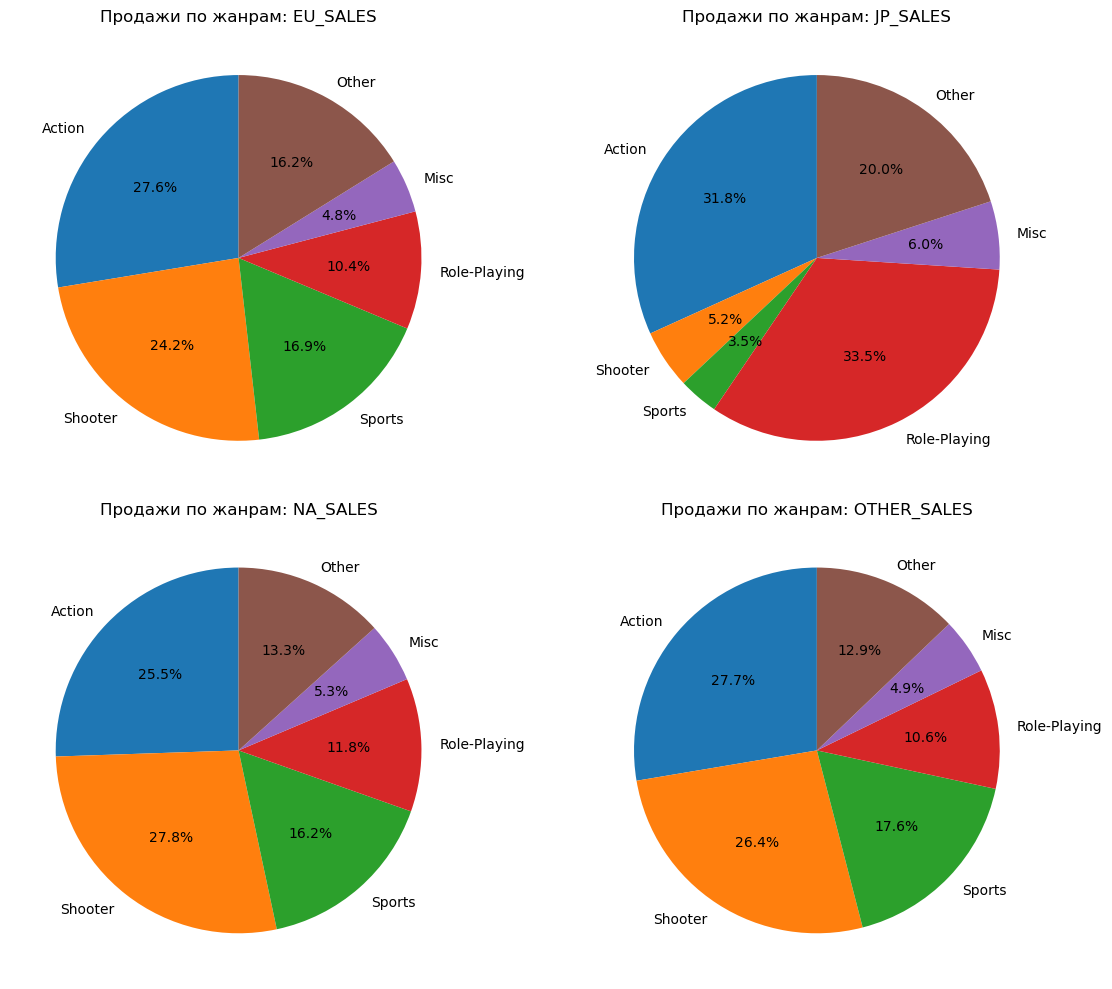

In [111]:
regions = top_5_region_genres.columns

# Создаем фигуру и оси (2 строки, 2 столбца)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Выравниваем оси в одном списке для удобства
axes = axes.flatten()

# Строим по одному pie chart для каждого региона
for i, region in enumerate(top_5_region_genres.columns):
    axes[i].pie(
        top_5_region_genres[region],
        labels=top_5_region_genres.index,      # жанры прямо на секторах
        autopct='%1.1f%%',                     # проценты
        startangle=90
    )
    axes[i].set_title(f'Продажи по жанрам: {region.upper()}')

plt.tight_layout()
plt.show()

В Японии популярнее всего жанры Action и Role-playing, в связи с тем, что большинство выпущенных игр в Японии относятся к данным жанрам.
В Европе и Северной Америке популярность жанров распределена более равномерно и объемы продаж более высокие, чем в Японии, что объясняется большим объёмом рынков и численностью аудитории.

### Влияние рейтинга ESRB на продажи по регионам

In [114]:
pivot_region_rating =  df.pivot_table(
    index='rating',
    values=['na_sales','eu_sales','jp_sales','other_sales'],
    aggfunc = 'sum'
)
#сводная таблица с продажами по рейтингу ESRB по регионам

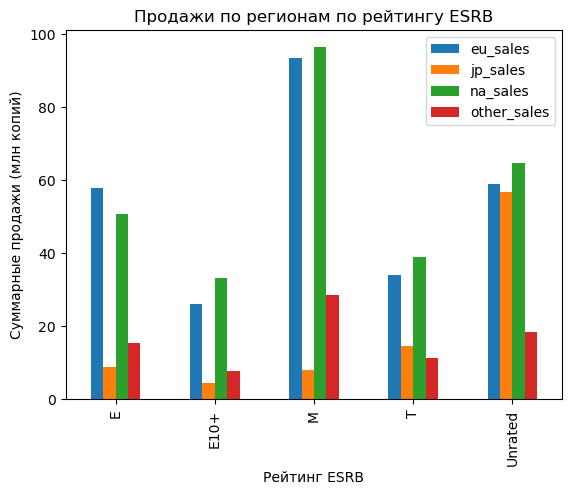

In [115]:
pivot_region_rating.plot(kind='bar',
                        title='Продажи по регионам по рейтингу ESRB');
plt.xlabel('Рейтинг ESRB');
plt.ylabel('Суммарные продажи (млн копий)');
#построение графика продажи по регионам по рейтингу ESRB

После преобразования датасета остались игры только с рейтингами E, E10+, M, T, Unrated. 

Лучше всего продажи у игр с рейтингом M (от 17 лет и старше) и E(для всех) и Unrated.

В Японии больше всего Unrated игр, так как рейтинг есть только в Северной Америке и Европе.

### Вывод
Был проведен анализ каждого региона. 

- У двух самых популярных платформ не развит японский регион. У 3DS, наоборот - японский регион самый успешный. У Ps3 и Xbox тоже не развит японский регион. У серии Xbox вообще нет игр в японском регионе, скорее всего компания не работает на японскую аудиторию.
- В Японии популярнее всего жанры Action и Role-playing, в связи с тем, что большинство выпущенных игр в Японии относятся к данным жанрам. 
- В Европе и Северной Америке популярность жанров распределена более равномерно и объемы продаж более высокие, чем в Японии, что объясняется большим объёмом рынков и численностью аудитории.
- Лучше всего продажи у игр с рейтингом M (от 17 лет и старше) и E(для всех) и Unrated.

- В Японии больше всего Unrated игр, так как рейтинг есть только в Северной Америке и Европе.

## Проверка гипотез
Задача: Проверить несколько статистических гипотез. 

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action и Sports разные.

In [119]:
alpha = 0.05

### Гипотеза о равенстве средних пользовательских рейтингов платформ Xbox One и PC.
Нулевая гипотеза: Cредние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза: Cредние пользовательские рейтинги платформ Xbox One и PC не равны.

In [121]:
user_xbox_score = df.query('platform=="XOne"')['user_score'].dropna() #пользовательские рейтинги XboxOne

In [122]:
user_pc_score = df.query('platform=="PC"')['user_score'].dropna() #пользовательские рейтинги PC

In [123]:
hypo_dur_results = st.ttest_ind(user_xbox_score,user_pc_score,alternative='two-sided')
print("p-value:", hypo_dur_results.pvalue)
if(hypo_dur_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

p-value: 0.10450507919348416
Не получилось отвергнуть нулевую гипотезу.


При уровне значимости 0.05 не получилось отвергнуть гипотезу, делаем вывод, что средние пользовательские рейтинги платформ Xbox One и PC равны.

### Гипотеза о равенстве пользовательских рейтингов жанров Action и Sports.
Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [126]:
user_action_score = df.query('genre=="Action"')['user_score'].dropna() #пользовательские рейтинги XboxOne

In [127]:
user_sports_score = df.query('genre=="Sports"')['user_score'].dropna() #пользовательские рейтинги XboxOne

In [128]:
user_action_score.mean()

6.760606060606061

In [129]:
user_sports_score.mean()

5.2251968503937

In [130]:
hypo_dur_results1 = st.ttest_ind(user_action_score,user_sports_score,alternative='two-sided')
print("p-value:", hypo_dur_results1.pvalue)
if(hypo_dur_results1.pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

p-value: 2.871114798510586e-19
Отвергаем нулевую гипотезу.


При уровне значимости 0.05 мы отвергаем нулевую гипотезу, делаем вывод, что средние пользовательские рейтинги жанров Action и Sports не равны.

### Вывод
Для проверки обеих гипотез был применён t-тест для независимых выборок (scipy.stats.ttest_ind), так как, сравнивались средние значения двух независимых выборок.
Были проверены 2 гипотезы:
 - Первая гипотезу отвергнуть не получилось, средние пользовательские рейтинги платформ Xbox One и PC равны.
 - Вторая гипотеза была отвергнута, средние пользовательские рейтинги жанров Action и Sports не равны.

## Общий вывод исследования

В рамках проекта был проведён анализ датасета, содержащего информацию о продажах видеоигр, жанрах, платформах, пользовательских и критических оценках.
Изначально датасет включал 16715 строк и 10 столбцов. В результате предобработки и фильтрации осталась 1689 строка — только актуальные данные за 2014–2016 годы, соответствующие современному игровому рынку.

Предобработка данных включала:

- Стандартизацию названий столбцов;

- Замену некорректных значений tbd в user_score на NaN;

- Замена пропусков в столбце rating на "Unrated";

- Удаление дубликатов (1 строка);

- Приведение типов данных (year_of_release, user_score);

- Удаление строк с пропусками в критически важных столбцах (name, genre, year_of_release);

- Добавление столбца total_sales — суммарных продаж по всем регионам.

Пропуски в других столбцах (critic_score, user_score) были оставлены — замена данных невозможна.

Результаты исследовательнского анализа:

- Распределение частоты выпуска игр по годам приближённое к нормальному, с пиком в 2008–2009 годах, но с выраженной асимметрией — левая часть более пологая, чем правая, распределение скошенно вправо. Игры, выпущенные до 1995 года, составляют крайне малую долю и были удалены.

- Характерный срок жизни платформы в топе - около 5 лет, за это время продажи у топовых платформ сохраняются на высоком уровне, потом идет сильный спад. Большинство топовых платформ появились в период 2004–2006 годов и к 2015–2016 утратили актуальность. В основном платформы выходят с интервалом в 1–3 года, чаще всего группами и достигают свой пик продаж примерно на 2-3 год после выпуска. 

- Новое поколение консолей — PS4 и XOne — начали набирать популярность с 2014 года, поэтому именно 2014–2016 выбраны как актуальный период анализа.

- По графику boxplot видно, что за последние 3 года у всех платформ медианные продажи на игру составляют менее 0.25 млн копий, с большим числом выбросов у 3DS, PS4 и XOne.

 - Положительная зависимость между оценкой критиков и продажами, около 0.4 на консолях PS3, PS4, XOne и менее выражена на консоли 3DS, 0.3. 
 
 - Между пользовательской оценкой и продажами у 3DS умеренная положительная связь (0.2), у PS3 небольшая отрицательная связь (-0.16), на других платформах связи не выявлено.

- По количеству выпущенных игр лидирует жанр Action (более 600 игр).

- Самые высокие суммарные продажи показали жанры Shooter и Action (более 150 млн копий), несмотря на то что игр жанра Shooter значительно меньше (128).

- Жанры Sports и Role-Playing также достигли высоких продаж (около 100 млн копий каждый).

- Жанр Shooter, с медианными продажами около 0.5 млн копий. Жанр Action имеет огромное количество выбросов, но медианное значение менее 0.25 млн. копий.

Региональный анализ:

- У платформ PS4 и PS3, японский рынок слабо развит. У XOne и Xbox360 игр в японском регионе нет, скорее всего компания не работает в Японии. В то же время у 3DS он является ключевым.

- В Японии наиболее популярны жанры Action и Role-Playing, что объясняется предпочтениями аудитории.

- В Европе и Северной Америке жанры распределены более равномерно, а продажи выше, что обусловлено размером рынков и численностью аудитории.

- Наибольшие продажи у игр с рейтингами M (от 17 лет) и E (для всех). В Японии больше всего Unrated игр, так как рейтинг ESRB есть только в Северной Америке и Европе.

Результаты гипотез при уровне значимости 0.05:

 - Средние пользовательские рейтинги платформ Xbox One и PC равны.
 
 - Средние пользовательские рейтинги жанров Action и Sports не равны.

Выводы исследования:

- Платформы с наибольшей долей продаж: Xbox One и PS4.

- Регионы с наибольшими объемами продаж: Европа и Северная Америка.

- Наиболее прибыльный жанр: Shooter.

- Актуальные ESRB рейтинги: M (от 17 лет и старше) и E(для всех) и Unrated.

- Оценки критиков положительно коррелируют с продажами. Пользовательские рейтинги значимого влияния не оказывают.

Стоит сконцентрировать рекламный бюджет на продвижении игр жанра Shooter с рейтингами M/E/Unrated на PS4 и Xbox One, и ориентированных на рынки Северной Америки и Европы, учитывать отзывы критиков.